<a href="https://colab.research.google.com/github/Divyakathirvel26/Covid-19/blob/master/Covid_19_Sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import preprocessing
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Sequential
import numpy as np

In [ ]:
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3),
               activation='relu'))

classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Flatten())

classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=2, activation='sigmoid'))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1. / 255, shear_range=0.2,
        zoom_range=0.2, horizontal_flip=True)
train_generator=train_datagen.flow_from_directory('drive/My Drive/covid-data/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 519 images belonging to 2 classes.


In [ ]:
print(train_generator.n)
print(train_generator.batch_size)
print(253//32)

519
32
7


In [ ]:
classifier.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
step_size_train=train_generator.n//train_generator.batch_size
r = classifier.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=20)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
16/16 [==============================] - 100s 6s/step - loss: 0.9523 - accuracy: 0.5359
Epoch 2/20
16/16 [==============================] - 9s 543ms/step - loss: 0.6906 - accuracy: 0.5667
Epoch 3/20
16/16 [==============================] - 9s 549ms/step - loss: 0.6806 - accuracy: 0.5832
Epoch 4/20
16/16 [==============================] - 9s 547ms/step - loss: 0.6726 - accuracy: 0.5811
Epoch 5/20
16/16 [==============================] - 9s 572ms/step - loss: 0.6558 - accuracy: 0.6181
Epoch 6/20
16/16 [==============================] - 9s 575ms/step - loss: 0.6557 - accuracy: 0.6037
Epoch 7/20
16/16 [==============================] - 9s 557ms/step - loss: 0.6444 - accuracy: 0.6181
Epoch 8/20
16/16 [==============================] - 9s 558ms/step - loss: 0.6387 - accuracy: 0.6078
Epoch 9/20
16/16 [==============================] - 9s 562ms/step - loss: 0.6438 - accuracy: 0.6140
Epoch 10/20
16/16 [======

dict_keys(['loss', 'accuracy'])


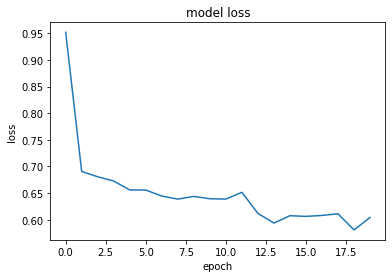

In [ ]:
import matplotlib.pyplot as plt
print(r.history.keys())
# Loss
plt.plot(r.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

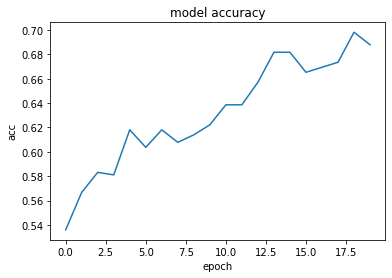

In [ ]:
plt.plot(r.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.show()